# Task


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

In [4]:
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [5]:
df = pd.read_csv("Housing.csv")

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


1. Write the linear regression hypothesis function in vector form;

In [7]:
def hypothesis(X, w):
    return np.dot(X, w)

2. Create a function for computing the loss function in vector form;

In [8]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(hypothesis(X, w) - y).sum() / (2*m)

3. Implement one step of gradient descent;

In [9]:
def gradient(X, y, w):
    m = y.size
    h = hypothesis(X, w)
    grad = X.T @ (h - y)   #.dot
    return grad / m

4. Find the best parameters *w* for a dataset predicting house prices based on the area, number of bathrooms, and number of bedrooms;
*This code fragment prepares the data and initializes parameters for further application of the gradient descent algorithm.*

In [10]:
X = df[["area", "bedrooms", "bathrooms"]].values
y = df["price"].values.reshape(-1, 1)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

X_norm = np.hstack((np.ones((y.size, 1)), X_norm))

n = X_norm.shape[1] - 1
w = np.zeros((n+1, 1))

learning_rate = 0.01
num_iterations = 1500
best_loss = np.inf
best_weights = None
loss_history = []

*This code fragment performs iterations of gradient descent and tracks changes in losses and parameters.*

In [11]:
for i in range(num_iterations):
    grad = gradient(X_norm, y_norm, w)
    w -= learning_rate * grad
    loss = loss_function(X_norm, y_norm, w)
    loss_history.append(loss)

    if loss < best_loss:
        best_loss = loss
        best_weights = w.copy()

*This code fragment utilizes the trained parameters to predict responses on normalized data and computes the Mean Squared Error (MSE) between the predicted responses and the normalized actual responses.*

In [12]:
y_pred = hypothesis(X_norm, best_weights)
mse = np.mean(np.square(y_norm - y_pred))


##Option 2. Solving the problem using the sklearn library.
*This code fragment uses the sklearn library to build linear regression and output the found model coefficients.*

In [13]:
X = np.array(df[['area', 'bedrooms', 'bathrooms']])
y = np.array(df['price'])
reg = LinearRegression().fit(X,y)

print(f'Model intercept: {reg.intercept_}')
print(f'Model coefficients: {reg.coef_}')

Model intercept: -173171.6076326361
Model coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]


5. Find the same parameters using an analytical solution;
*This code fragment utilizes an analytical method to calculate the parameters of linear regression, predicts responses on normalized data, and computes the Mean Squared Error (MSE) for the analytical solution.*

In [14]:
X_norm_analytical = np.hstack((np.ones((y.size, 1)), X_norm[:, 1:]))
w_analytical = np.linalg.inv(X_norm_analytical.T @ X_norm_analytical) @ X_norm_analytical.T @ y_norm
y_pred_analytical = hypothesis(X_norm_analytical, w_analytical)
mse_analytical = np.mean(np.square(y_norm - y_pred_analytical))


##Option 2. Solving the problem using the sklearn library.

*This code fragment utilizes the analytical method to calculate the coefficients of the linear regression model.*

In [15]:
X = np.array(df[['area', 'bedrooms', 'bathrooms']])
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = np.array(df['price'])
params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('Model intercept:', params[0])
print('Model coefficients:', params[1:])

Model intercept: -173171.6076326356
Model coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]


6. Compare the obtained results.

In [16]:
print("Mean squared error (gradient descent): {:.4f}".format(mse))
print("Mean squared error (analytical solution): {:.4f}".format(mse_analytical))

Mean squared error (gradient descent): 0.5129
Mean squared error (analytical solution): 0.5129


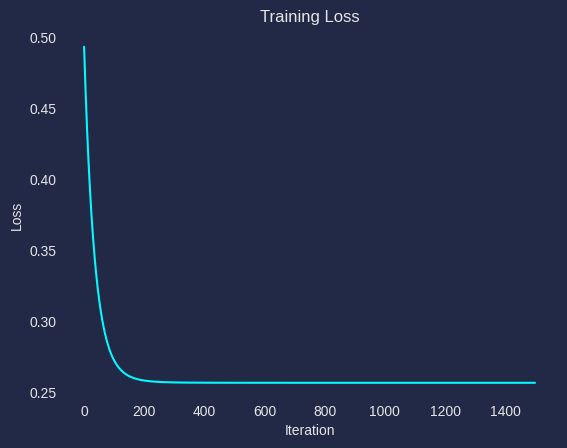

In [17]:
loss_df = pd.DataFrame(loss_history, columns=['loss'])
loss_df['iteration'] = np.arange(num_iterations)
sns.lineplot(x='iteration', y='loss', data=loss_df)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.show()

In [18]:
loss_df = pd.DataFrame(loss_history, columns=['loss'])
loss_df['iteration'] = np.arange(num_iterations)
fig = px.line(loss_df, x='iteration', y='loss')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='Loss')
fig.update_layout(title_text='Training Loss', title_x=0.5, showlegend=False)
fig.show()